<a href="https://colab.research.google.com/github/al3xiss20/Machine-Learning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

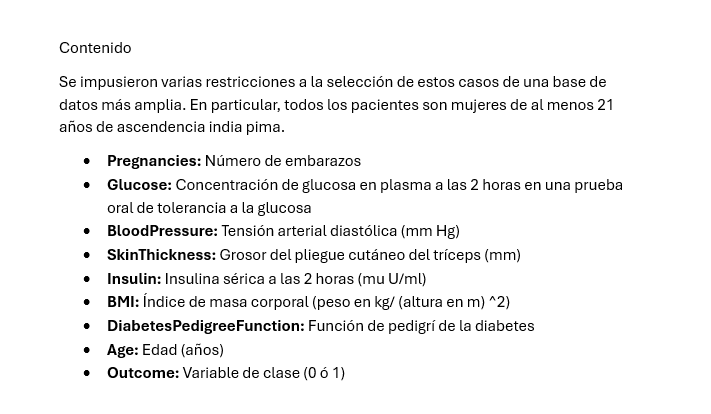

In [ ]:
#Importamos la base de datos diabetes.csv de kaggle
base= pd.read_csv("/content/archive (1) (1).zip")
base.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Conocemos el tamaño de la data
base.shape

(768, 9)

In [ ]:
#Verificamos registros
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Resumen estadistico
base.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#EDA


In [ ]:
#hacemos una copia de la data
base_2 = base.copy()
base_2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Vemos que dentro del resumen se encuentran valores en 0 que son incongruentes y los remplazamos
base_2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = base_2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)


In [ ]:
base_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

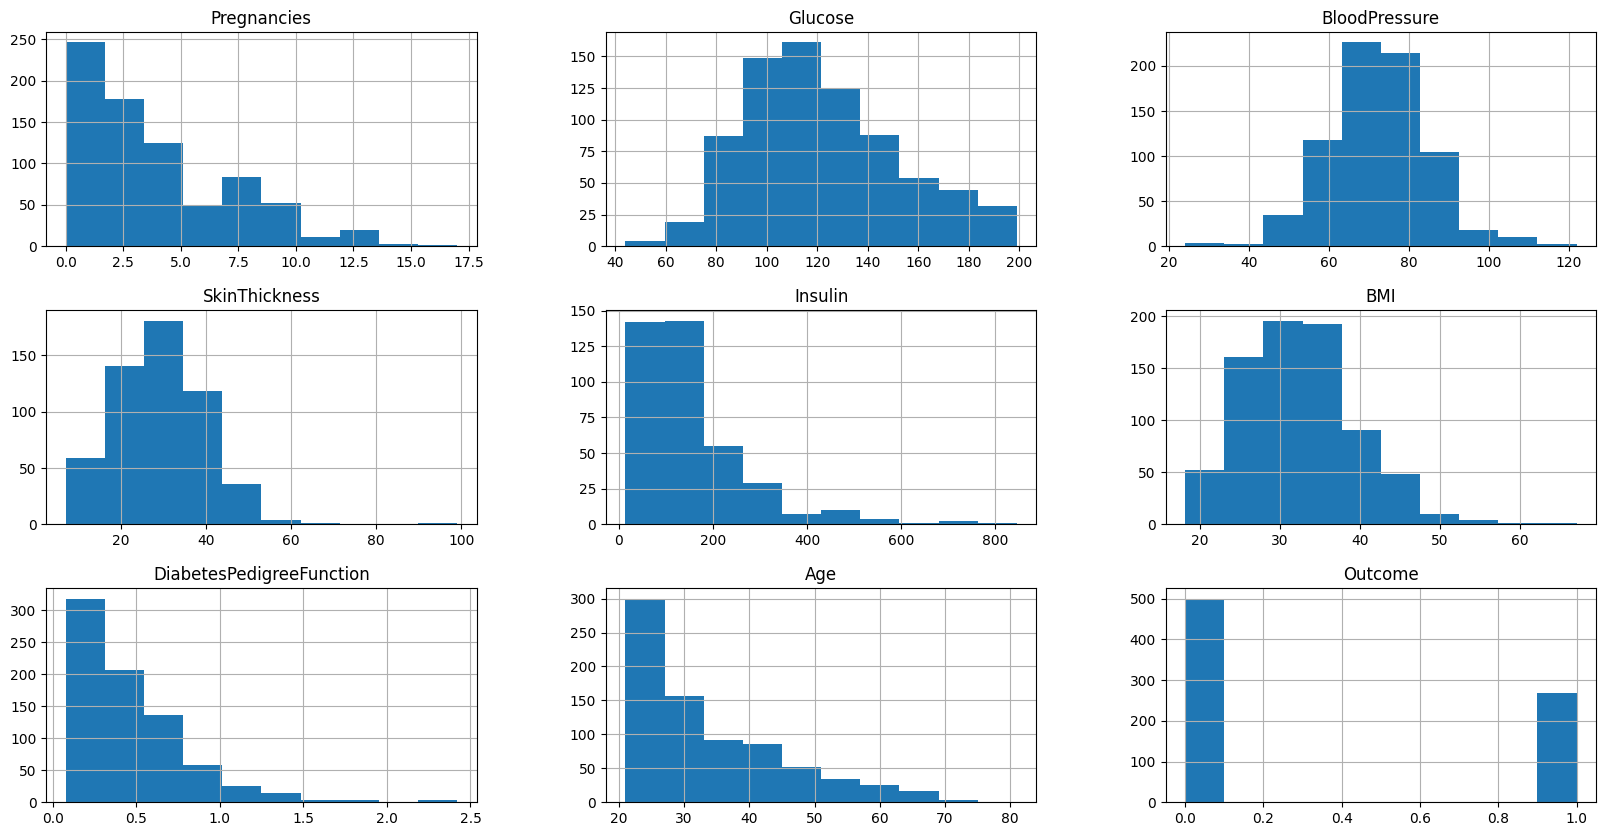

In [ ]:
#Graficar los datos para tener mejor panorma de los datos
base_2.hist(figsize=(20,10))

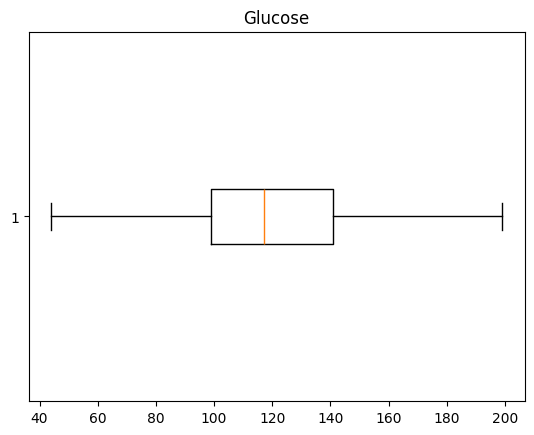

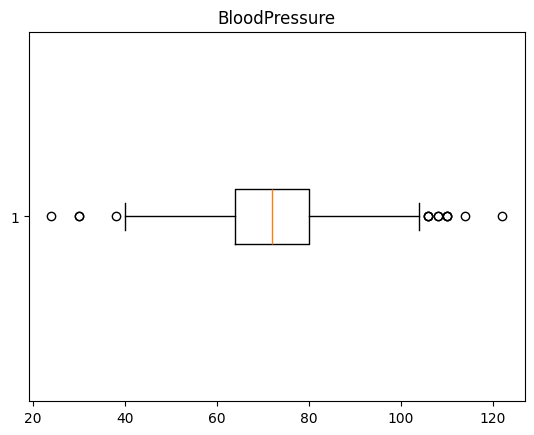

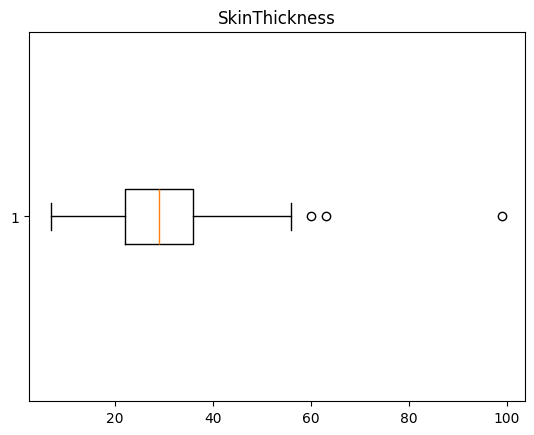

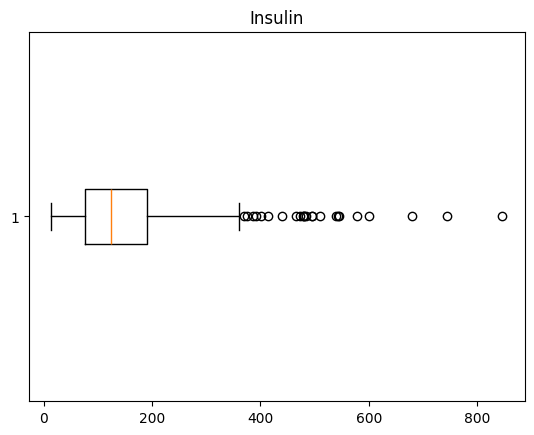

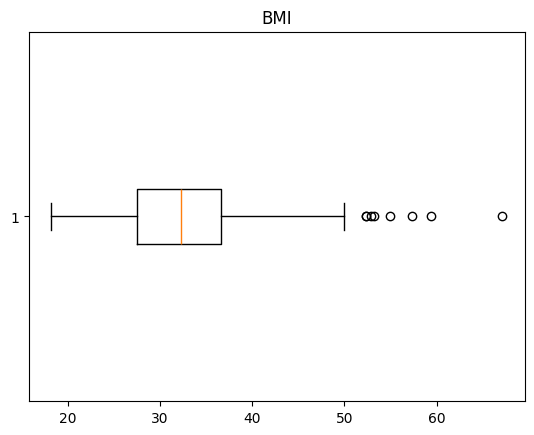

In [ ]:
colum = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in colum:
  plt.boxplot(base_2[col].dropna(), vert=False)
  plt.title(col)
  plt.show()

#CORRECIÓN DE VARIABLES


In [ ]:
#Observando el histograma y el diagrama de cajas, ya sabemos que valores son atipicos y cuales se pueden tratar con media o mediana
base_2['Glucose'] = base_2['Glucose'].fillna(base_2['Glucose'].mean())
base_2['BloodPressure'] = base_2['BloodPressure'].fillna(base_2['BloodPressure'].median())
base_2['SkinThickness'] = base_2['SkinThickness'].fillna(base_2['SkinThickness'].median())
base_2['Insulin'] = base_2['Insulin'].fillna(base_2['Insulin'].median())
base_2['BMI'] = base_2['BMI'].fillna(base_2['BMI'].median())

In [ ]:
#Verificamos que los datos esten completos y coherentes
base_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
base_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

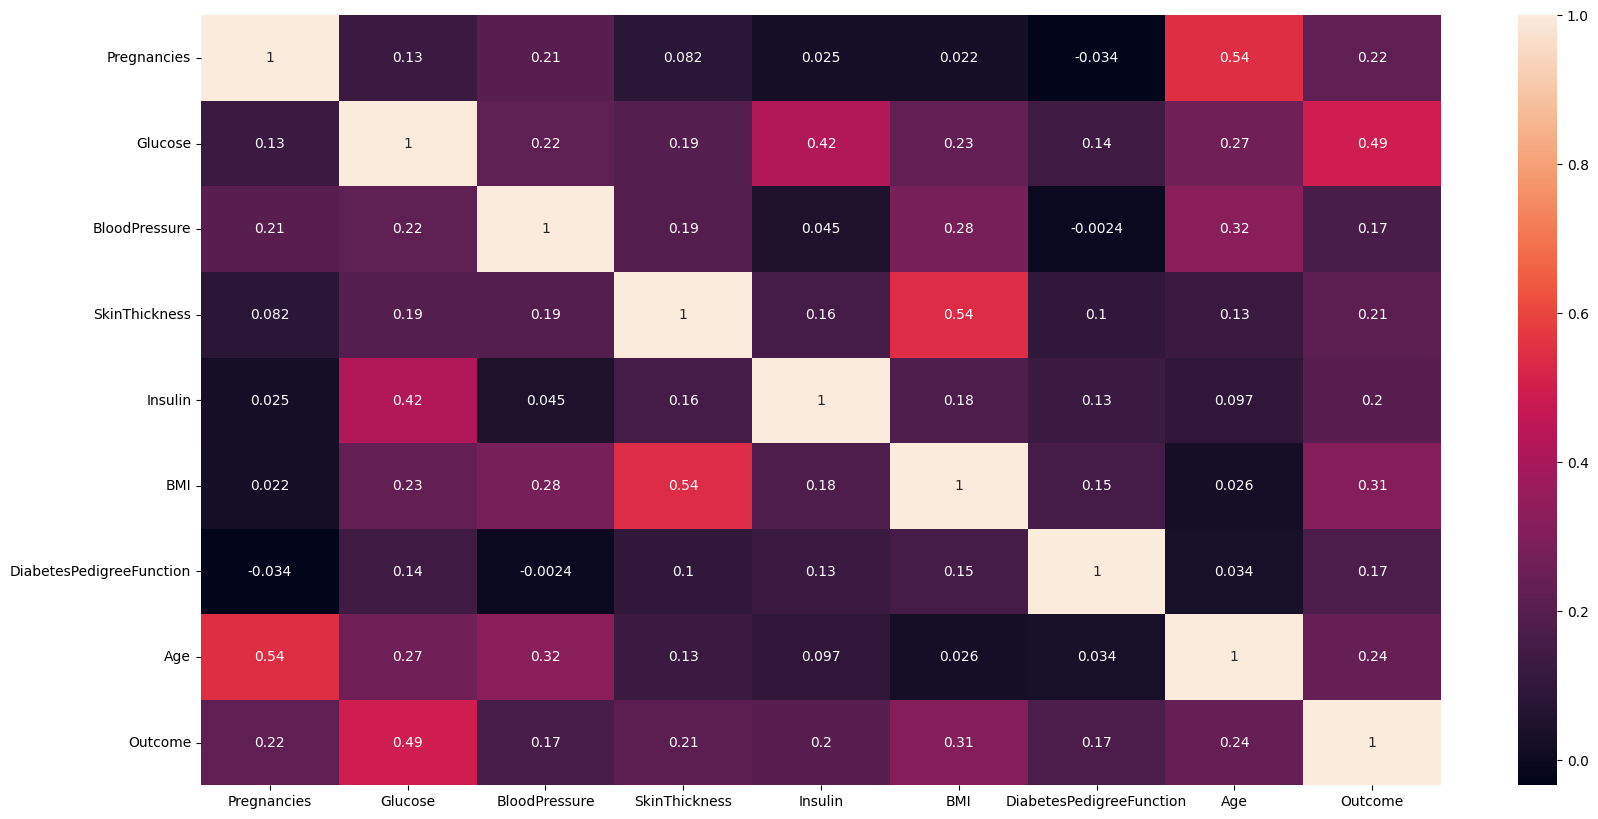

In [ ]:
#Observamos los datos que tengan mas correlación
plt.figure(figsize=(20,10))
sns.heatmap(base_2.corr(), annot=True)

In [ ]:
#Escalado de variables
x = base_2.drop('Outcome', axis=1).values
y = base_2['Outcome'].values

In [ ]:
#Dividimos algoritmo de entranamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


K-NN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Precision: 0.5396825396825397
Recall: 0.6181818181818182
F1 Score: 0.576271186440678


In [ ]:
test_f1 = []
test_pre = []
test_rec = []
test_score = []

for i in range(1,16):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)

  test_f1.append(round(f1_score(y_test, y_pred) *100, 2))
  test_pre.append(round(precision_score(y_test, y_pred) *100, 2))
  test_rec.append(round(recall_score(y_test, y_pred) *100, 2))
  test_score.append(round(knn.score(x_test, y_pred) *100, 2))

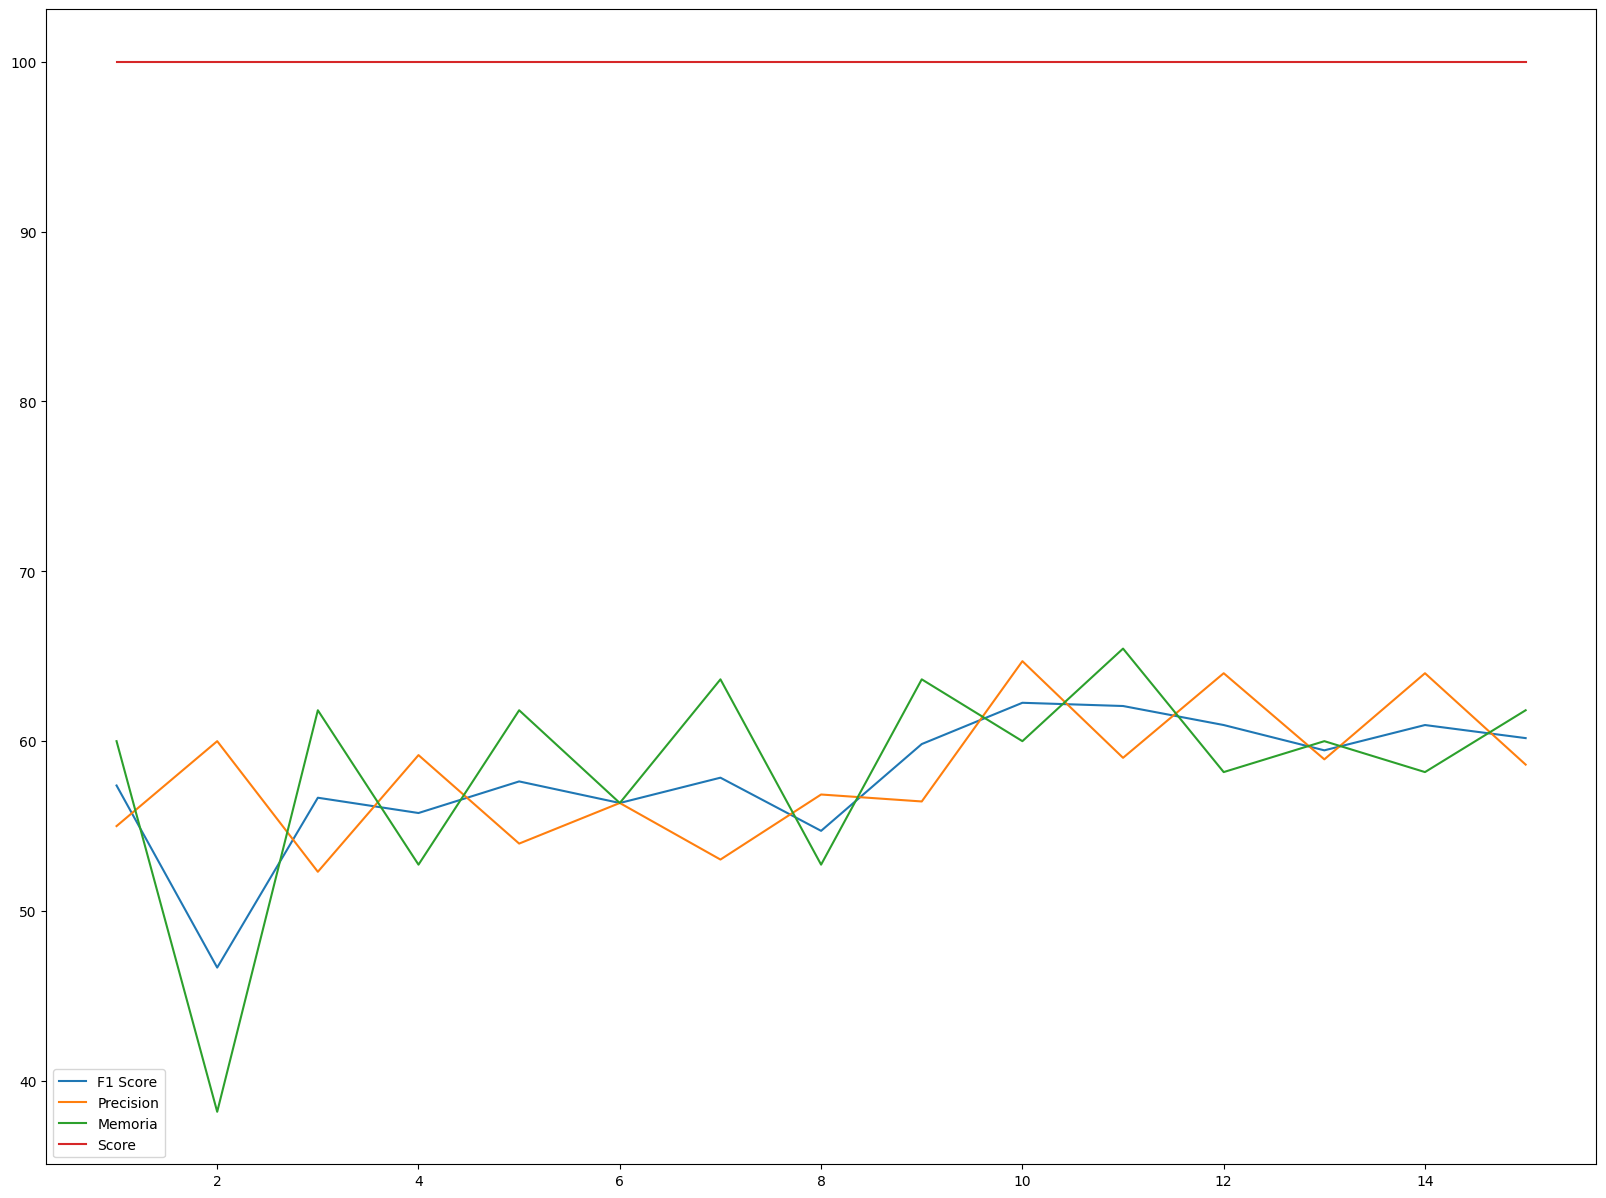

In [50]:
plt.figure(figsize=(20,15))
plt.plot(range(1,16), test_f1, label='F1 Score')
plt.plot(range(1,16), test_pre, label='Precision')
plt.plot(range(1,16), test_rec, label='Memoria')
plt.plot(range(1,16), test_score, label='Score')
plt.legend()
plt.show()

#EXPERIMENTACIÓN CRUZADA


In [64]:

from sklearn.model_selection import cross_val_score

for i in range(1,16):
  knn = KNeighborsClassifier(i)
  scores = cross_val_score(knn, x_train, y_train, cv=5)
  print('knn', i)
  print('scores', scores)
  print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))


knn 1
scores [0.70731707 0.69918699 0.68292683 0.68292683 0.63114754]
Accuracy: 0.68 (+/- 0.05)
knn 2
scores [0.70731707 0.75609756 0.70731707 0.72357724 0.70491803]
Accuracy: 0.72 (+/- 0.04)
knn 3
scores [0.73170732 0.76422764 0.66666667 0.73170732 0.71311475]
Accuracy: 0.72 (+/- 0.06)
knn 4
scores [0.68292683 0.77235772 0.67479675 0.7398374  0.73770492]
Accuracy: 0.72 (+/- 0.07)
knn 5
scores [0.72357724 0.75609756 0.72357724 0.72357724 0.7295082 ]
Accuracy: 0.73 (+/- 0.03)
knn 6
scores [0.71544715 0.7804878  0.75609756 0.74796748 0.75409836]
Accuracy: 0.75 (+/- 0.04)
knn 7
scores [0.71544715 0.74796748 0.74796748 0.75609756 0.78688525]
Accuracy: 0.75 (+/- 0.05)
knn 8
scores [0.70731707 0.73170732 0.73170732 0.72357724 0.77868852]
Accuracy: 0.73 (+/- 0.05)
knn 9
scores [0.72357724 0.7398374  0.74796748 0.72357724 0.73770492]
Accuracy: 0.73 (+/- 0.02)
knn 10
scores [0.68292683 0.7398374  0.72357724 0.72357724 0.74590164]
Accuracy: 0.72 (+/- 0.04)
knn 11
scores [0.69105691 0.73170732 0.

#RandomizedSeachCV


In [65]:
#Ajustar el número de vecinos para tener mejor precisión en generar no tomamos ninguna variable como principal

from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_neighbors': np.arange(1,16),'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
print('Mejores parámetros:', random_search.best_params_)
print('Mejor puntuación de validación cruzada:', random_search.best_score_)


Mejores parámetros: {'weights': 'uniform', 'n_neighbors': 6}
Mejor puntuación de validación cruzada: 0.7508196721311475
